In [71]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**DATA CLEANING**

In [72]:
# Membaca dan membersihkan dataset
# data = read_clean_csv("D:/shaff/kuliah/#semester4/machine learning/IMDB Dataset.csv")

data = pd.read_csv("D:/shaff/kuliah/semester4/machine learning/IMDB Dataset.csv")
# Membersihkan Dataset
data = data.drop_duplicates()  # Menghapus data duplikat
data = data.dropna()  # Menghapus baris dengan data yang tidak lengkap
data['review'] = data['review'].str.lower()  # Mengonversi teks ulasan menjadi huruf kecil
data.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


Kode ini bertujuan untuk membaca dan membersihkan dataset ulasan IMDB dengan menghapus duplikat, menghapus baris yang tidak lengkap, dan mengonversi teks ulasan menjadi huruf kecil. Langkah-langkah ini penting untuk memastikan bahwa dataset yang digunakan dalam analisis atau pelatihan model machine learning bebas dari masalah yang dapat mempengaruhi hasil akhir, seperti duplikasi, nilai yang hilang, dan inkonsistensi dalam teks.

Proses pembersihan ini membantu dalam menciptakan dataset yang lebih bersih dan dapat diandalkan untuk langkah-langkah analisis atau pelatihan model machine learning selanjutnya.

In [73]:
# Menampilkan informasi dataset untuk memastikan pembersihan berhasil
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


DataFrame yang dihasilkan setelah proses pembersihan memiliki 49,582 baris dan 2 kolom tanpa nilai yang hilang. Kolom 'review' menyimpan teks ulasan, dan kolom 'sentiment' menyimpan label sentimen (positif atau negatif). Semua data ini disimpan sebagai objek tipe string (object) di pandas, dan keseluruhan DataFrame menggunakan lebih dari 1.1 MB memori.

Proses pembersihan berhasil menghapus duplikat dan nilai yang hilang, menghasilkan dataset yang lebih bersih dan siap untuk analisis atau pelatihan model machine learning.

In [74]:
print(data['sentiment'].unique())


['positive' 'negative']


Kolom 'sentiment' dalam DataFrame data berisi dua kelas sentimen yang berbeda:

'positive': Menunjukkan ulasan film yang memiliki sentimen positif.
'negative': Menunjukkan ulasan film yang memiliki sentimen negatif.

Ini berarti dataset ini adalah dataset klasifikasi biner, di mana model machine learning nantinya akan dilatih untuk mengklasifikasikan ulasan film sebagai positif atau negatif berdasarkan teks ulasannya.

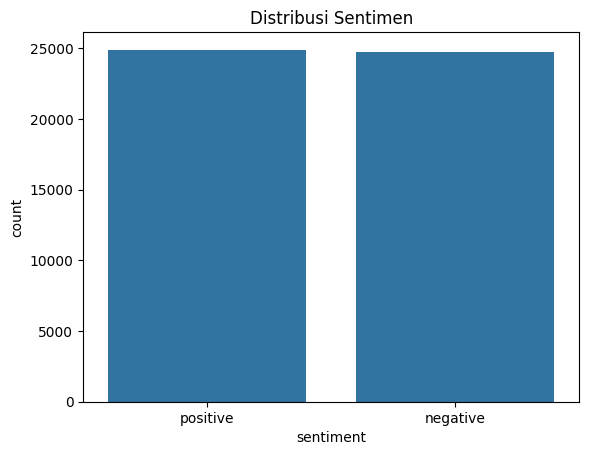

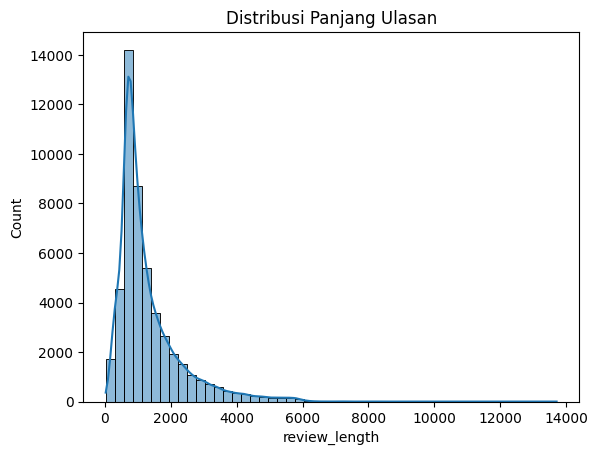

In [75]:

# Distribusi sentimen
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Sentimen')
plt.show()

# Panjang ulasan
data['review_length'] = data['review'].apply(len)
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Ulasan')
plt.show()

Distribusi Sentimen
Pada visualisasi distribusi sentimen, kita dapat melihat jumlah ulasan yang dikategorikan sebagai 'positive' dan 'negative'. Kedua kategori memiliki jumlah yang hampir sama, masing-masing sekitar 25.000 ulasan. Hal ini menunjukkan bahwa dataset memiliki distribusi sentimen yang seimbang, yang ideal untuk melatih model machine learning karena model tidak akan bias terhadap salah satu sentimen.

Distribusi Panjang Ulasan
Pada visualisasi distribusi panjang ulasan, histogram menunjukkan bahwa sebagian besar ulasan memiliki panjang antara 0 hingga 2000 karakter. Distribusi ini memiliki ekor yang panjang, menunjukkan adanya beberapa ulasan yang sangat panjang hingga lebih dari 12.000 karakter. Kurva KDE memberikan gambaran yang lebih halus dari distribusi panjang ulasan, memperlihatkan puncak tertinggi sekitar 200 karakter. Hal ini menunjukkan bahwa meskipun ada beberapa ulasan yang panjang, kebanyakan ulasan tetap relatif pendek.

**TRAINING MODEL**

In [76]:
# Membagi data menjadi fitur (X) dan label (y)
X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

Kode ini mempersiapkan data untuk pelatihan model machine learning dengan memisahkan dataset menjadi fitur (X) dan label (y). Fitur (input) X berisi teks ulasan film, sementara label (target) y berisi nilai numerik yang mewakili sentimen dari ulasan tersebut (1 untuk positif dan 0 untuk negatif). Konversi label ini penting untuk memfasilitasi proses pelatihan model machine learning, yang umumnya bekerja dengan label numerik untuk klasifikasi.

In [77]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Kode ini membagi dataset menjadi dua bagian: set pelatihan (70% dari data) dan set pengujian (30% dari data). Pembagian ini dilakukan untuk memungkinkan pelatihan model pada satu subset data (X_train dan y_train) dan evaluasi kinerja model pada subset lain yang tidak terlihat selama pelatihan (X_test dan y_test). Pembagian dengan proporsi ini membantu dalam mengevaluasi kemampuan generalisasi model pada data baru yang tidak dilihat selama pelatihan.

In [78]:
# Mengonversi teks menjadi fitur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Kode ini menggunakan TfidfVectorizer untuk mengonversi teks ulasan film menjadi representasi numerik berbasis TF-IDF. Proses ini dilakukan dalam dua langkah:

Pelatihan dan Transformasi pada Set Pelatihan: Teks ulasan di X_train diubah menjadi matriks TF-IDF, yang kemudian disimpan dalam X_train_tfidf.

Transformasi pada Set Pengujian: Teks ulasan di X_test diubah menjadi matriks TF-IDF menggunakan model TF-IDF yang sudah dilatih pada X_train, hasilnya disimpan dalam X_test_tfidf.

Dengan cara ini, teks ulasan film yang semula berbentuk string dapat digunakan sebagai input numerik untuk model machine learning.

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

def show_chart(class_report, model_name):
    # Prepare data for plotting
    metrics = ['precision', 'recall', 'f1-score']
    class_labels = list(class_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    plot_data = {}
    for metric in metrics:
        plot_data[metric] = [class_report[label][metric] for label in class_labels]
    plot_df = pd.DataFrame(plot_data, index=class_labels)

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot Precision, Recall, F1-Score
    plot_df.plot(kind='bar', ax=ax, ylim=(0, 1), colormap='viridis')
    ax.set_title('Precision, Recall, and F1-Score for Each Class')
    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_xticklabels(class_labels, rotation=0)
    ax.legend(loc='lower right')

    # Add labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()


Fungsi show_chart digunakan untuk memvisualisasikan metrik kinerja model klasifikasi (precision, recall, dan f1-score) dalam bentuk grafik batang, yang memudahkan analisis dan interpretasi kinerja model pada setiap kelas. Fungsi ini membantu dalam memahami seberapa baik model bekerja untuk setiap kategori dalam dataset yang diklasifikasikan.

Naive Bayes
Accuracy: 0.8511596638655462
Confusion Matrix:
 [[6267 1137]
 [1077 6394]]
Classification Report:
 {'0': {'precision': 0.8533496732026143, 'recall': 0.8464343598055105, 'f1-score': 0.8498779495524816, 'support': 7404.0}, '1': {'precision': 0.8490240339928297, 'recall': 0.8558425913532325, 'f1-score': 0.8524196773763498, 'support': 7471.0}, 'accuracy': 0.8511596638655462, 'macro avg': {'precision': 0.8511868535977221, 'recall': 0.8511384755793715, 'f1-score': 0.8511488134644157, 'support': 14875.0}, 'weighted avg': {'precision': 0.8511771118220227, 'recall': 0.8511596638655462, 'f1-score': 0.8511545376917837, 'support': 14875.0}}



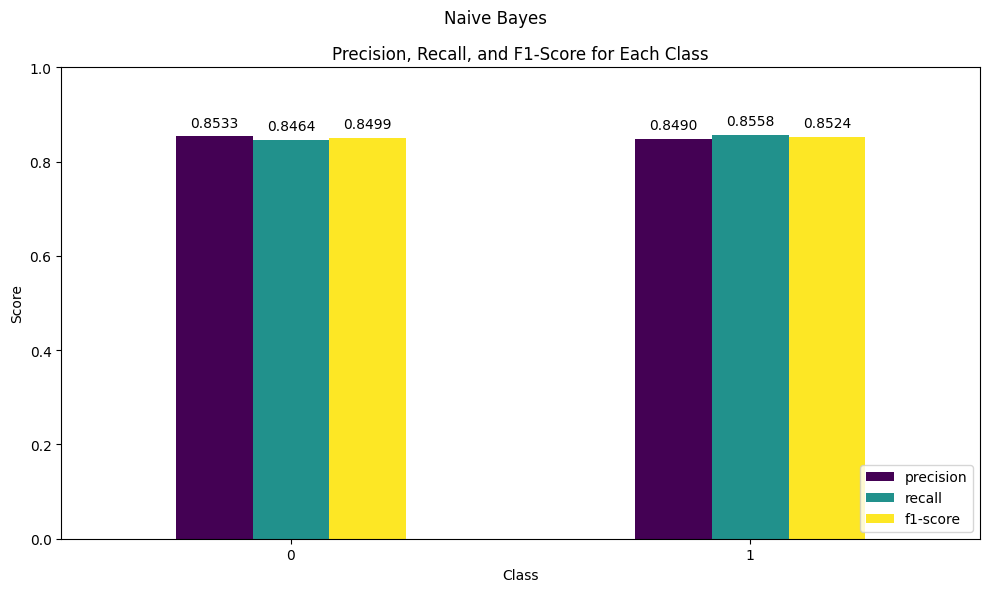

Logistic Regression
Accuracy: 0.890890756302521
Confusion Matrix:
 [[6532  872]
 [ 751 6720]]
Classification Report:
 {'0': {'precision': 0.8968831525470273, 'recall': 0.8822258238789843, 'f1-score': 0.8894941104378021, 'support': 7404.0}, '1': {'precision': 0.8851422550052687, 'recall': 0.8994779815285772, 'f1-score': 0.8922525393347939, 'support': 7471.0}, 'accuracy': 0.890890756302521, 'macro avg': {'precision': 0.8910127037761479, 'recall': 0.8908519027037807, 'f1-score': 0.890873324886298, 'support': 14875.0}, 'weighted avg': {'precision': 0.8909862620909279, 'recall': 0.890890756302521, 'f1-score': 0.8908795371463349, 'support': 14875.0}}



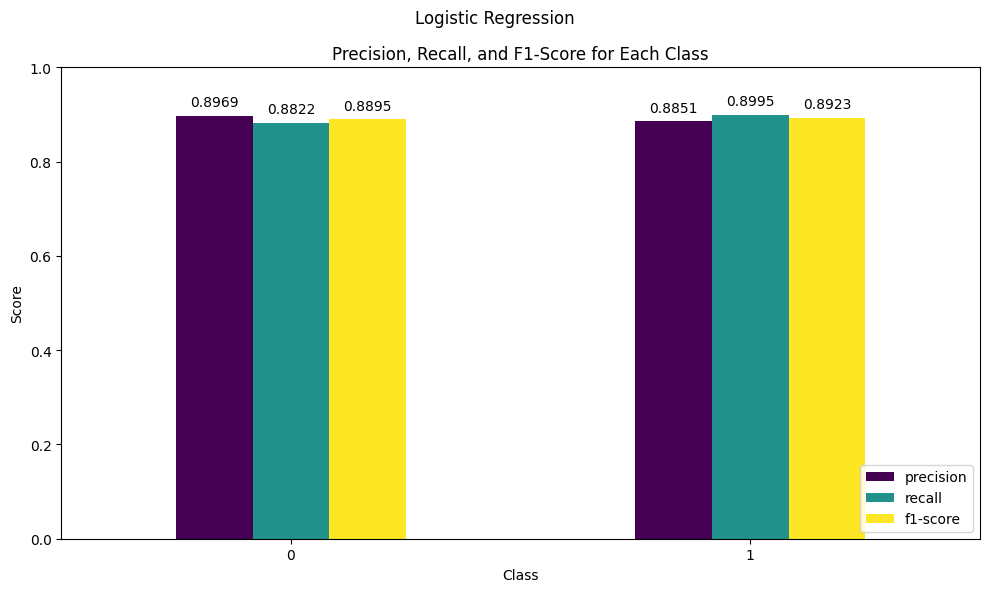

Multilayer Perceptron
Accuracy: 0.851563025210084
Confusion Matrix:
 [[6369 1035]
 [1173 6298]]
Classification Report:
 {'0': {'precision': 0.8444709626093875, 'recall': 0.8602106969205835, 'f1-score': 0.8522681653954235, 'support': 7404.0}, '1': {'precision': 0.8588572207827628, 'recall': 0.8429929059028243, 'f1-score': 0.8508511213185626, 'support': 7471.0}, 'accuracy': 0.851563025210084, 'macro avg': {'precision': 0.8516640916960752, 'recall': 0.8516018014117039, 'f1-score': 0.851559643356993, 'support': 14875.0}, 'weighted avg': {'precision': 0.8516964910001968, 'recall': 0.851563025210084, 'f1-score': 0.8515564520308366, 'support': 14875.0}}



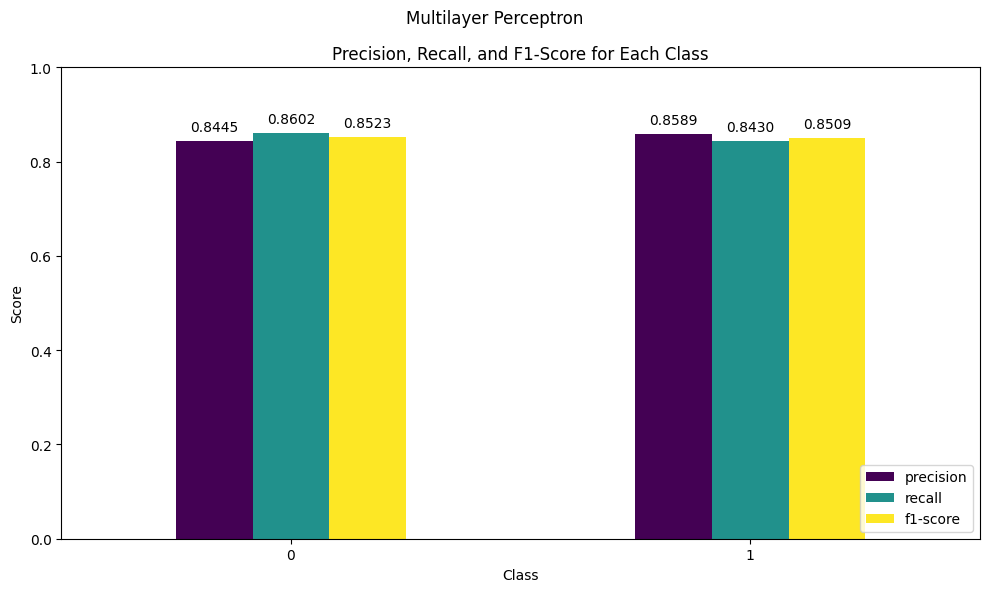

Decision Tree
Accuracy: 0.7062857142857143
Confusion Matrix:
 [[5289 2115]
 [2254 5217]]
Classification Report:
 {'0': {'precision': 0.7011799018957974, 'recall': 0.7143435980551054, 'f1-score': 0.7077005419147655, 'support': 7404.0}, '1': {'precision': 0.7115384615384616, 'recall': 0.6983000936956231, 'f1-score': 0.7048571235560359, 'support': 7471.0}, 'accuracy': 0.7062857142857143, 'macro avg': {'precision': 0.7063591817171295, 'recall': 0.7063218458753642, 'f1-score': 0.7062788327354007, 'support': 14875.0}, 'weighted avg': {'precision': 0.7063825102380055, 'recall': 0.7062857142857143, 'f1-score': 0.7062724290705256, 'support': 14875.0}}



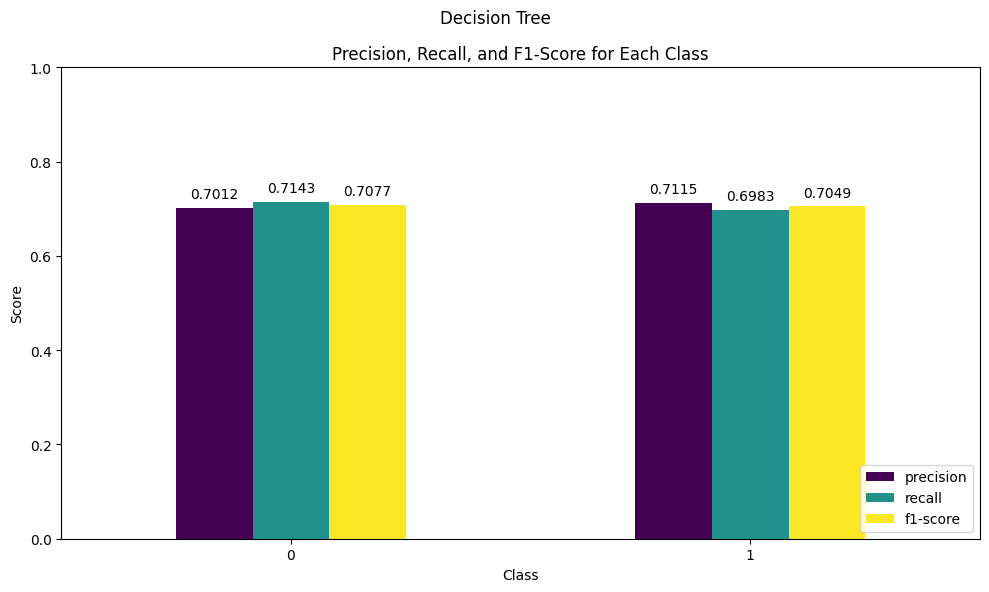

Random Forest
Accuracy: 0.8377142857142857
Confusion Matrix:
 [[6253 1151]
 [1263 6208]]
Classification Report:
 {'0': {'precision': 0.8319584885577435, 'recall': 0.8445434900054025, 'f1-score': 0.8382037533512064, 'support': 7404.0}, '1': {'precision': 0.843592879467319, 'recall': 0.8309463257930665, 'f1-score': 0.8372218476062037, 'support': 7471.0}, 'accuracy': 0.8377142857142857, 'macro avg': {'precision': 0.8377756840125312, 'recall': 0.8377449078992345, 'f1-score': 0.8377128004787051, 'support': 14875.0}, 'weighted avg': {'precision': 0.8378018858340756, 'recall': 0.8377142857142857, 'f1-score': 0.8377105891279516, 'support': 14875.0}}



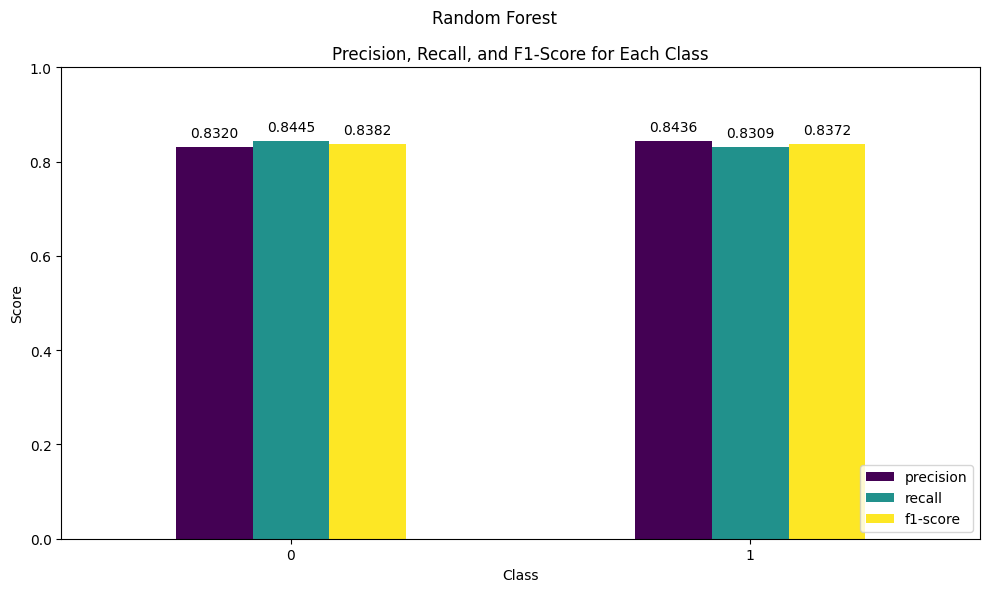

kNearest Neighbor
Accuracy: 0.7210084033613445
Confusion Matrix:
 [[5227 2177]
 [1973 5498]]
Classification Report:
 {'0': {'precision': 0.7259722222222222, 'recall': 0.7059697460831983, 'f1-score': 0.715831279101616, 'support': 7404.0}, '1': {'precision': 0.7163517915309446, 'recall': 0.7359121938160889, 'f1-score': 0.7260002640961309, 'support': 7471.0}, 'accuracy': 0.7210084033613445, 'macro avg': {'precision': 0.7211620068765834, 'recall': 0.7209409699496436, 'f1-score': 0.7209157715988734, 'support': 14875.0}, 'weighted avg': {'precision': 0.7211403406965392, 'recall': 0.7210084033613445, 'f1-score': 0.720938673178525, 'support': 14875.0}}



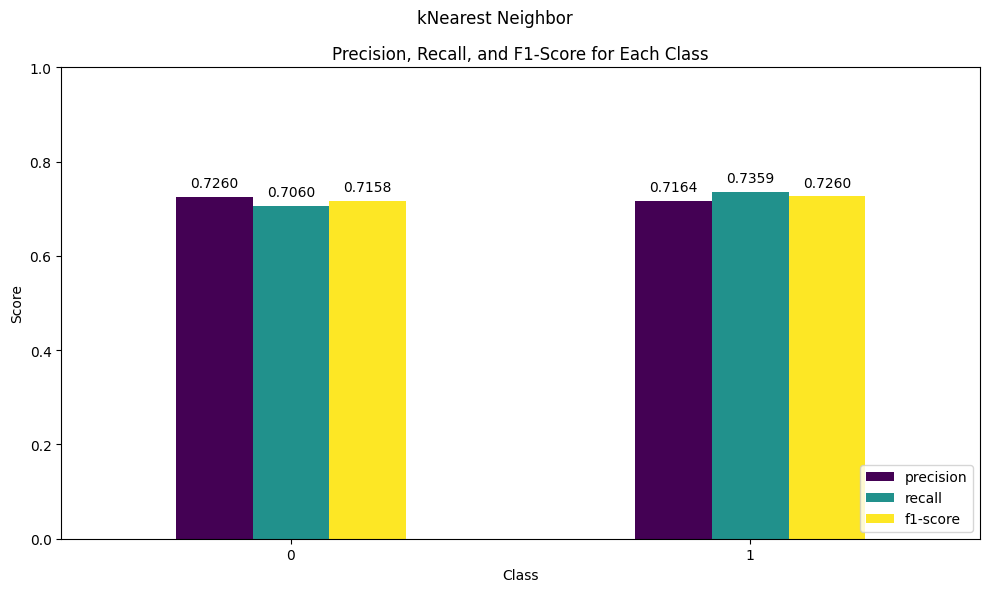

c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy: 0.8293109243697478
Confusion Matrix:
 [[5979 1425]
 [1114 6357]]
Classification Report:
 {'0': {'precision': 0.8429437473565488, 'recall': 0.8075364667747164, 'f1-score': 0.8248603159274333, 'support': 7404.0}, '1': {'precision': 0.8168851195065536, 'recall': 0.850890108419221, 'f1-score': 0.8335409427653576, 'support': 7471.0}, 'accuracy': 0.8293109243697478, 'macro avg': {'precision': 0.8299144334315511, 'recall': 0.8292132875969687, 'f1-score': 0.8292006293463954, 'support': 14875.0}, 'weighted avg': {'precision': 0.8298557467738722, 'recall': 0.8293109243697478, 'f1-score': 0.8292201789933918, 'support': 14875.0}}



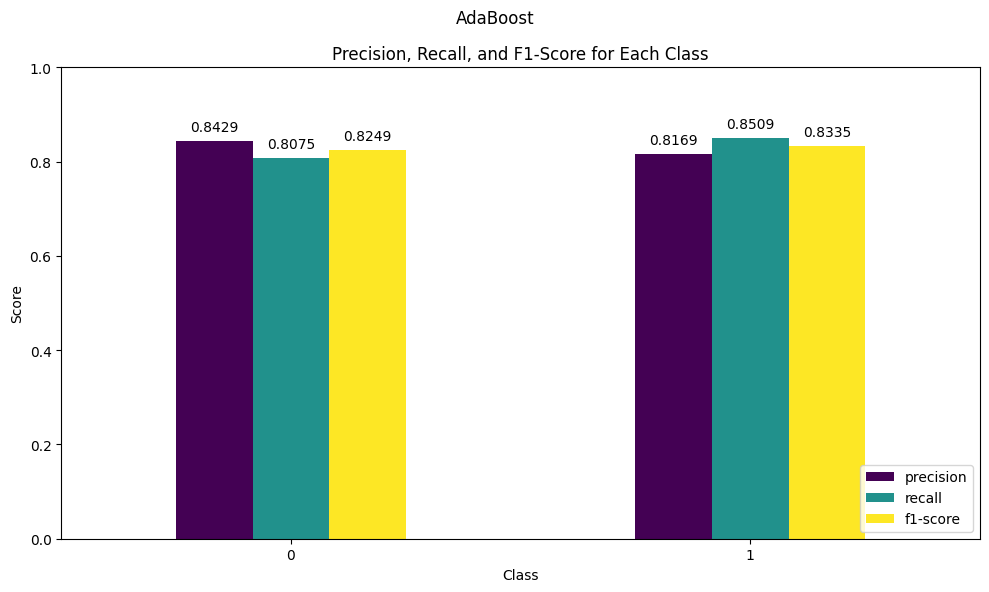

Gradient Boosting
Accuracy: 0.8066554621848739
Confusion Matrix:
 [[5579 1825]
 [1051 6420]]
Classification Report:
 {'0': {'precision': 0.8414781297134238, 'recall': 0.7535116153430578, 'f1-score': 0.7950691178566339, 'support': 7404.0}, '1': {'precision': 0.7786537295330503, 'recall': 0.8593227144960514, 'f1-score': 0.8170017816238229, 'support': 7471.0}, 'accuracy': 0.8066554621848739, 'macro avg': {'precision': 0.8100659296232371, 'recall': 0.8064171649195546, 'f1-score': 0.8060354497402284, 'support': 14875.0}, 'weighted avg': {'precision': 0.8099244427387972, 'recall': 0.8066554621848739, 'f1-score': 0.8060848443107294, 'support': 14875.0}}



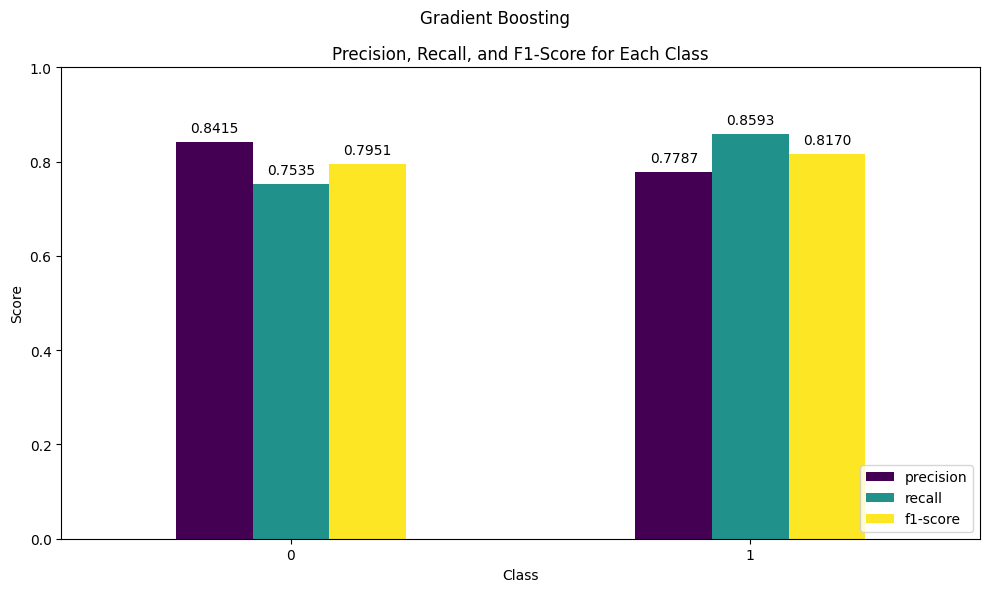

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = [
    MultinomialNB(), 
    LogisticRegression(), 
    MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42)
    ]

models_name = [
    'Naive Bayes',
    'Logistic Regression',
    'Multilayer Perceptron',
    'Decision Tree',
    'Random Forest',
    'kNearest Neighbor',
    'AdaBoost',
    'Gradient Boosting'
]

accuracies = []

for i in range(len(models)):
    model = models[i]
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    accuracies.append(accuracy)
    
    print(models_name[i])
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("")

    
    show_chart(class_report, models_name[i])



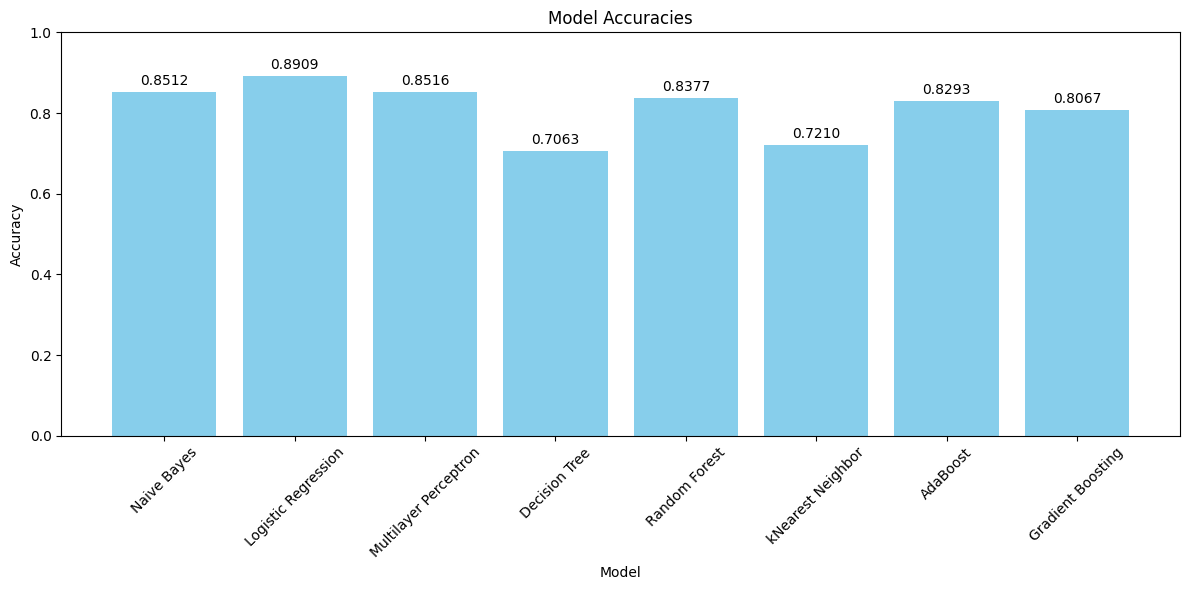

In [81]:
plt.figure(figsize=(12, 6))
plt.bar(models_name, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [83]:
# Grid Search untuk optimasi hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(lr_model, param_grid, refit=True, verbose=2)
grid.fit(X_train_tfidf, y_train)
best_model = grid.best_estimator_

# Hasil terbaik
print("hasil terbaik")
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.1s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.2s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.3s
[CV] END ............................C=0.1, solve

Proses ini menunjukkan bagaimana menggunakan Grid Search CV untuk mengoptimalkan hyperparameter pada model Logistic Regression. Hasilnya adalah model terbaik yang dapat digunakan untuk prediksi berdasarkan data TF-IDF dari training set.

In [84]:
# Predict using the best model
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8908235294117647
Confusion Matrix:
 [[6529  875]
 [ 749 6722]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7404
           1       0.88      0.90      0.89      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



In [88]:
def predict_sentiment(text):
    text = text.lower()  # Konversi teks menjadi huruf kecil
    text_vectorized = vectorizer.transform([text])  # Konversi teks menjadi fitur TF-IDF
    prediction = best_model.predict(text_vectorized)
    sentiment = 'positive' if prediction == 1 else 'negative'
    return sentiment

In [91]:
predict_sentiment("the film is bad")

'negative'